In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

In [42]:
import numpy as np

class Kmeans:
    def __init__(self, k, n_init=10):
        self.k = k
        self.n_init = n_init
        self.best_centroids = None
        self.best_points = None
        self.best_score = np.inf

    def init_centroids(self, X_train):
        assert X_train.shape[0] >= self.k
        random_indices=np.random.permutation(X_train.shape[0])
        centroid_idx=random_indices[:self.k]
        centroids=[X_train[centroid_idx]]
        
        return np.array(centroids)

    def nerst_pt_ctrid(self, X_train, centroids):
        dis = np.linalg.norm(X_train[:, np.newaxis] - centroids, axis=2)
        points = np.argmin(dis, axis=1)
        return points

    def mean_points(self, X_train, points):
        centroids = np.zeros((self.k, X_train.shape[1]))
        for i in range(self.k):
            centroid_mean = X_train[points == i].mean(axis=0)
            centroids[i] = centroid_mean
        return centroids

    def eval_metric(self, X_train, centroids, points):
        distances = np.linalg.norm(X_train - centroids[points], axis=1)
        return np.sum(distances ** 2)

    def fit_single(self, X_train):
        centroids = self.init_centroids(X_train)
        for _ in range(300):
            points = self.nerst_pt_ctrid(X_train, centroids)
            new_centroids = self.mean_points(X_train, points)
            centroids = new_centroids
        score_1 = self.eval_metric(X_train, centroids, points)
        return centroids, points, score_1

    def fit(self, X_train):
        for _ in range(self.n_init):
            centroids, points, score_1 = self.fit_single(X_train)
            if score_1 < self.best_score:
                self.best_score = score_1
                self.best_centroids = centroids
                self.best_points = points
        return self.best_centroids, self.best_points

In [43]:
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)


In [44]:
X_train

array([[-7.41022539e-01, -1.39810733e+00],
       [ 8.63953021e-01,  4.40723544e-01],
       [-1.01166503e-01,  9.64210115e-01],
       [ 5.95944612e-01,  1.39929506e-02],
       [-1.21239451e+00,  6.55763042e-01],
       [-9.20168405e-01, -1.93215120e+00],
       [ 1.43559779e+00, -3.24266793e-01],
       [ 1.27355790e+00, -2.42277447e-01],
       [ 1.35899941e+00,  7.00586117e-02],
       [-1.27611560e-01,  9.95266298e-01],
       [-2.33675259e-01,  1.11436028e+00],
       [-8.53135438e-01, -1.83084866e+00],
       [ 6.98254297e-01, -8.89748629e-02],
       [-3.41448216e-02,  9.93587123e-01],
       [ 1.52249270e+00,  3.28696328e-02],
       [-1.13101128e+00,  7.98602697e-01],
       [ 7.75395515e-01,  3.34166611e-01],
       [ 6.55066263e-01,  2.67440612e-01],
       [-9.56215614e-01, -1.69739634e+00],
       [-8.72029488e-01,  8.30160716e-01],
       [-1.04593856e+00,  8.19266178e-01],
       [ 1.65072163e+00, -3.01630888e-01],
       [ 3.47734326e-02,  7.05899234e-01],
       [-6.

In [45]:
X_train.shape

(100, 2)

In [46]:
kmeans = Kmeans(k=centers)
kmeans.fit(X_train)

(array([[-1.25790785,  0.78626163],
        [-0.08246807,  0.98545119],
        [ 1.38517539, -0.20092083],
        [ 0.83815529,  0.19285925],
        [-0.85560376, -1.78334025]]),
 array([4, 3, 1, 3, 0, 4, 2, 2, 2, 1, 1, 4, 3, 1, 2, 0, 3, 3, 4, 0, 0, 2,
        1, 4, 0, 0, 3, 3, 3, 2, 4, 0, 3, 3, 3, 0, 1, 1, 1, 2, 4, 2, 2, 2,
        0, 1, 1, 4, 0, 3, 3, 2, 2, 4, 2, 0, 3, 3, 1, 1, 2, 1, 0, 4, 0, 4,
        3, 3, 4, 3, 0, 4, 4, 4, 3, 0, 2, 0, 3, 4, 3, 4, 0, 2, 0, 1, 0, 1,
        1, 1, 0, 1, 4, 2, 4, 1, 4, 1, 2, 2]))

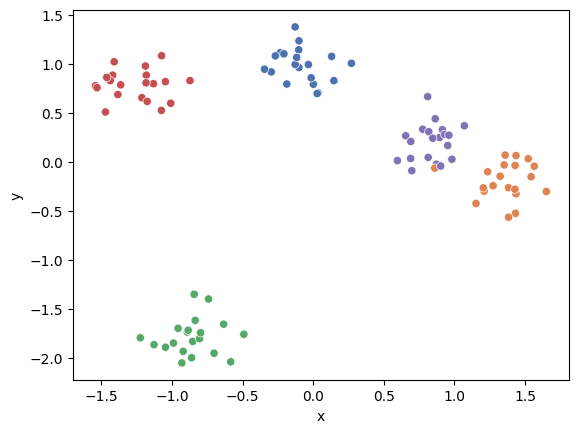

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

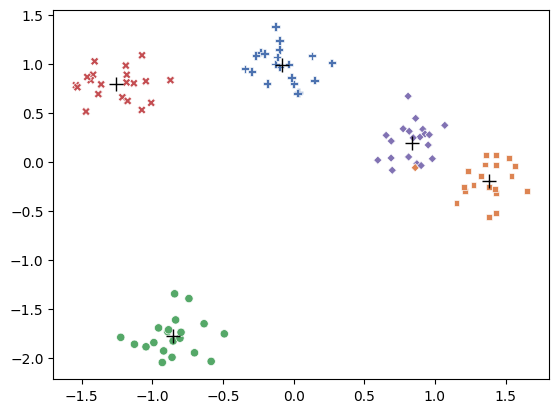

In [60]:
kmeans = Kmeans(k=5)
# View results
class_centers, classification = kmeans.fit(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.best_centroids],
         [y for _, y in kmeans.best_centroids],
         'k+',
         markersize=10,
         )
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


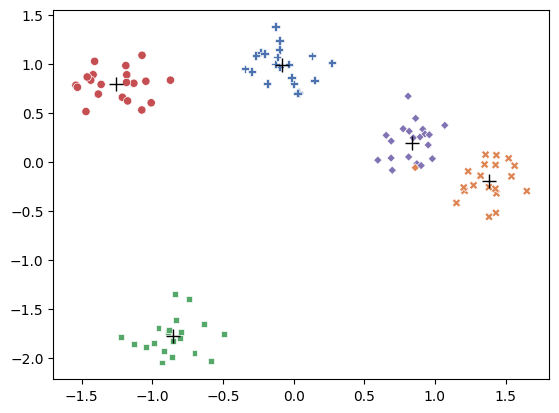

In [55]:
# KMEANS From SKLEARN

kmeans = KMeans(n_clusters=5)
# View results
point = kmeans.fit(X_train)
classification=kmeans.labels_
class_centers=kmeans.cluster_centers_
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in class_centers],
         [y for _, y in class_centers],
         'k+',
         markersize=10,
         )
plt.show()